Data read into a pandas dataframe!


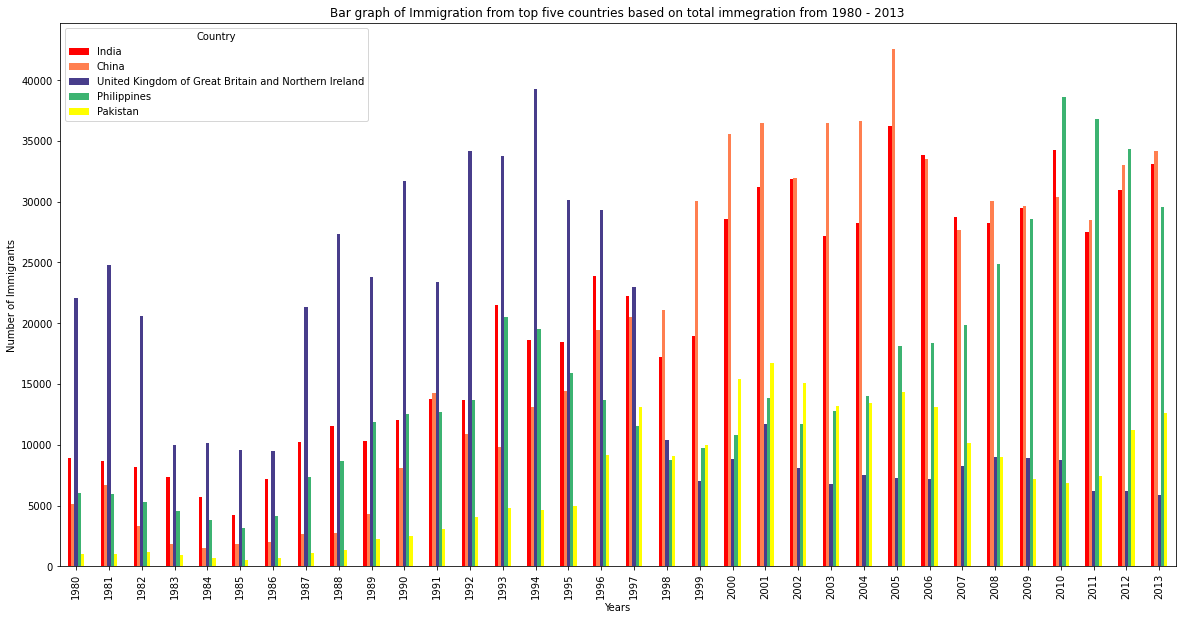

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the dataset
df_canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

#Data Cleaning
df_canada.head(10)
column_list = df_canada.columns.values
column_list
years = list(map(str, range(1980,2014)))
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True) 
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada['Total'] = df_canada.sum(axis=1)
df_canada.columns = list(map(str, df_canada.columns))
all(isinstance(column, str) for column in df_canada.columns)
a = df_canada.set_index('Country', inplace= True)
df_canada.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_t = df_canada.head(5).loc[: , years].transpose()
df_t.head()

#Visualization
df_t.plot(kind='bar',
          figsize=(20, 10), 
          color=['red','coral', 'darkslateblue', 'mediumseagreen','yellow'],
          rot = 90
         )
plt.title('Bar graph of Immigration from top five countries based on total immegration from 1980 - 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants') 

plt.show()